## Set Up for Analysis

In [5]:
# set up and dependencies
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.orm import Session
from sqlalchemy import func
import pandas as pd 
from pprint import pprint

%load_ext nb_black

<IPython.core.display.Javascript object>

In [6]:
# set up Base

Base = declarative_base()

<IPython.core.display.Javascript object>

In [7]:
#create class for measurement table

class Measurement(Base):
    __tablename__ = "measurement"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Float)

<IPython.core.display.Javascript object>

In [8]:
#create class for station table

class Station(Base):
    __tablename__ = "station"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation =  Column(Float)

<IPython.core.display.Javascript object>

In [9]:
# create engine and session to link to the database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(bind=engine)

<IPython.core.display.Javascript object>

## Precipitation Analysis

In [11]:
# look at first 5 of measurement table

measurement_rows = session.query(Measurement).limit(5)

for row in measurement_rows:
    pprint(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f0be3a181d0>,
 'date': datetime.date(2010, 1, 1),
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f0be3a18b50>,
 'date': datetime.date(2010, 1, 2),
 'id': 2,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 63.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f0be3a18990>,
 'date': datetime.date(2010, 1, 3),
 'id': 3,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 74.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f0be3a70190>,
 'date': datetime.date(2010, 1, 4),
 'id': 4,
 'prcp': 0.0,
 'station': 'USC00519397',
 'tobs': 76.0}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f0be3a70090>,
 'date': datetime.date(2010, 1, 6),
 'id': 5,
 'prcp': None,
 'station': 'USC00519397',
 'tobs': 73.0}


<IPython.core.display.Javascript object>

In [12]:
#check the max date in data
max_date = session.query(func.max(Measurement.date)).first()[0]

print(max_date)

2017-08-23


<IPython.core.display.Javascript object>

In [16]:
# get the last 12 months of precipitation data

recent_prcp = session.query(Measurement.date, func.round(func.sum(Measurement.prcp), 2)).filter(Measurement.date > '2016-08-23').filter(Measurement.date <= '2017-08-23').group_by(Measurement.date).order_by(Measurement.date).all()
        
pprint(recent_prcp)

[(datetime.date(2016, 8, 24), 9.33),
 (datetime.date(2016, 8, 25), 0.54),
 (datetime.date(2016, 8, 26), 0.1),
 (datetime.date(2016, 8, 27), 0.32),
 (datetime.date(2016, 8, 28), 3.1),
 (datetime.date(2016, 8, 29), 1.46),
 (datetime.date(2016, 8, 30), 0.07),
 (datetime.date(2016, 8, 31), 3.18),
 (datetime.date(2016, 9, 1), 0.03),
 (datetime.date(2016, 9, 2), 0.25),
 (datetime.date(2016, 9, 3), 1.27),
 (datetime.date(2016, 9, 4), 1.38),
 (datetime.date(2016, 9, 5), 0.34),
 (datetime.date(2016, 9, 6), 1.23),
 (datetime.date(2016, 9, 7), 2.0),
 (datetime.date(2016, 9, 8), 0.46),
 (datetime.date(2016, 9, 9), 1.07),
 (datetime.date(2016, 9, 10), 1.4),
 (datetime.date(2016, 9, 11), 1.25),
 (datetime.date(2016, 9, 12), 1.54),
 (datetime.date(2016, 9, 13), 2.71),
 (datetime.date(2016, 9, 14), 14.28),
 (datetime.date(2016, 9, 15), 4.96),
 (datetime.date(2016, 9, 16), 0.82),
 (datetime.date(2016, 9, 17), 0.68),
 (datetime.date(2016, 9, 18), 0.53),
 (datetime.date(2016, 9, 19), 0.32),
 (datetime.da

<IPython.core.display.Javascript object>

In [50]:
# load query results into a Pandas dataframe

prcp_df = pd.DataFrame(recent_prcp, columns = ["Date", "Precipitation"])

# set index to the date column

prcp_df.set_index("Date")

prcp_df

,Date,Precipitation
0,2016-08-24,9.33
1,2016-08-25,0.54
2,2016-08-26,0.10
3,2016-08-27,0.32
4,2016-08-28,3.10
...,...,...
360,2017-08-19,0.09
361,2017-08-20,0.01
362,2017-08-21,0.58
363,2017-08-22,0.50


<IPython.core.display.Javascript object>

In [53]:
# create date range for x tick frequency in plot

prcp_monthly = pd.date_range(start="2016-08-24", end="2017-08-23", freq="M")
prcp_monthly

DatetimeIndex(['2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='M')

<IPython.core.display.Javascript object>

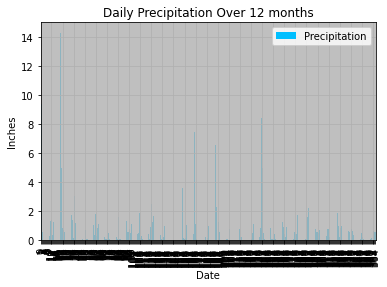

<IPython.core.display.Javascript object>

In [55]:
# plot precipitation results using Dataframe plot method
prcp_plot = prcp_df.plot(kind = "bar", title = "Daily Precipitation Over 12 months", color = "deepskyblue", grid=True, rot=90)
prcp_plot.set_ylabel("Inches")
prcp_plot.set_xlabel("Date")
plt.show()


In [40]:
# print a summary statistics table for the precipitation data
precipitation = prcp_df["Precipitation"].to_frame()
precipitation.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


<IPython.core.display.Javascript object>

## Station Analysis

In [74]:
#calculate the total number of stations

total_stations = session.query(func.count(func.distinct(Measurement.station))).first()[0]
total_stations


9

<IPython.core.display.Javascript object>

In [75]:
#find the most active stations

active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

<IPython.core.display.Javascript object>